In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## Example 2-1 Image Blur

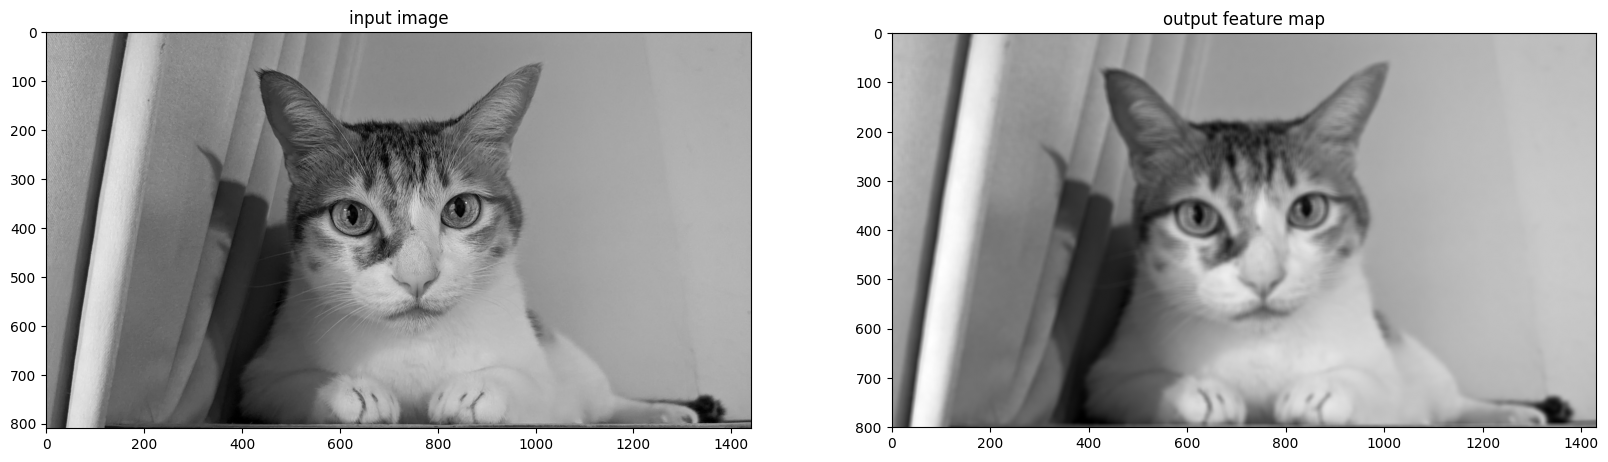

In [25]:
# Read the image and convert to grayscale
img = Image.open('/content/cat.jpg').convert('L')
img = np.array(img)

# Create initialization parameters (average filter)
w = np.ones((10, 10, 1, 1), dtype='float32')

# Define the convolution layer
conv = tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(10, 10),
    strides=(1, 1),
    padding='valid',
    use_bias=False
)

# Prepare input tensor
x = img.astype('float32').reshape(1, img.shape[0], img.shape[1], 1)
x = tf.constant(x)

# Build the convolution layer to initialize weights
_ = conv(x)
conv.set_weights([w])

# Apply convolution
y = conv(x)
out = y.numpy()

# Plot the input and output images
plt.figure(figsize=(20, 10))

f = plt.subplot(121)
f.set_title('input image')
plt.imshow(img, cmap='gray')

f = plt.subplot(122)
f.set_title('output feature map')
out = out.squeeze()
plt.imshow(out, cmap='gray')

plt.show()

## Example 2-2 Edge Detection

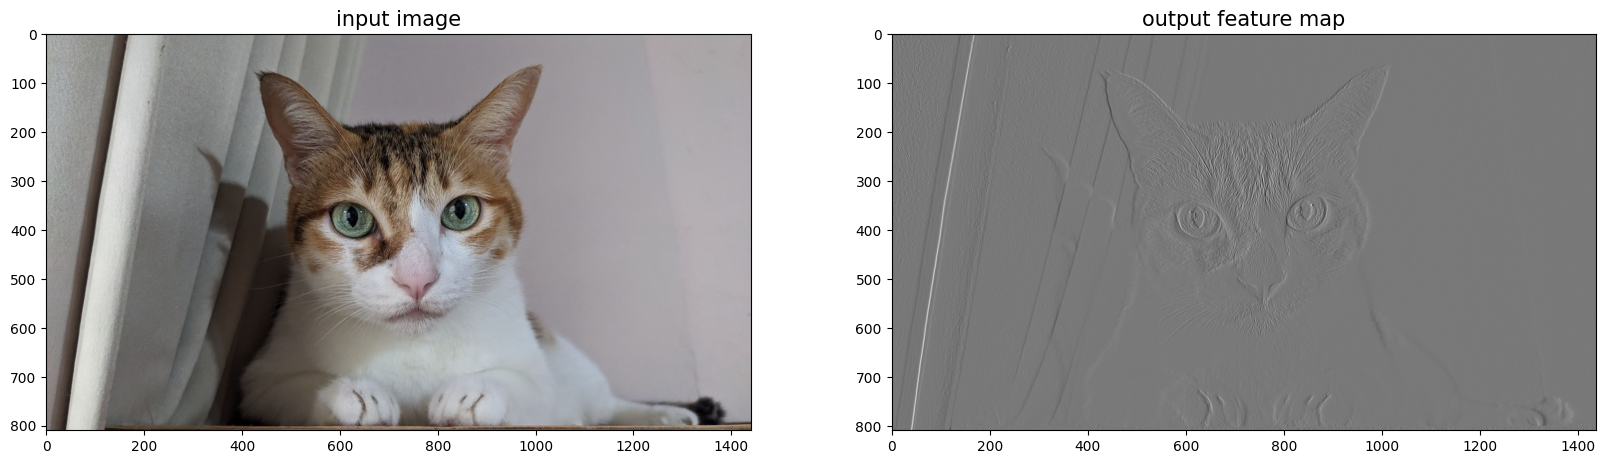

In [36]:
# Read the image
img = Image.open('/content/cat.jpg')

# Set kernel parameters (Sobel X)
w = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float32')
w = w.reshape((3, 3, 1, 1))

# Since input channels = 3, replicate kernel across 3 input channels
w = np.repeat(w, 3, axis=2)  # shape becomes (3, 3, 3, 1)

# Define convolution layer
conv = tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='valid',
    use_bias=False
)

# Prepare input tensor: shape [N, H, W, C]
x = np.array(img).astype('float32')
x = x.reshape((1, img.height, img.width, 3))
x_tensor = tf.constant(x)

# Build the conv layer and set the weights
_ = conv(x_tensor)
conv.set_weights([w])

# Apply convolution
y = conv(x_tensor)
out = y.numpy()

# Plot input and output
plt.figure(figsize=(20, 10))

f = plt.subplot(121)
f.set_title('input image', fontsize=15)
plt.imshow(img)

f = plt.subplot(122)
f.set_title('output feature map', fontsize=15)
plt.imshow(out.squeeze(), cmap='gray')

plt.show()